# 設定幾種流程 分類模型
## 1. 全部feature配上不同的模型
## 2. 做imputation後，配上不同的模型
## 3. 使用feature selection後，配上不同的模型
## 4. 使用imputation，接上feature selection後，使用不同的模型

# 設定幾種流程 預測數值模型：以生存時間為例
## 1. 全部feature配上不同的模型
## 2. 做imputation後，配上不同的模型
## 3. 使用feature selection後，配上不同的模型
## 4. 使用imputation，接上feature selection後，使用不同的模型

## 1. Feature selection

In [1]:
import pandas as pd
data = pd.read_csv("Data.csv")

In [2]:
data.head()

,Unnamed: 0,icustay_id,leavetime,los,intime,outtime,first_careunit,admittime,deathtime,dischtime,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
0,0,298201,233.694722,9.8318,2185-09-04 21:48:19.000,2185-09-14 17:46:08.000,MICU,2185-09-01 03:19:00.000,2185-09-14 15:30:00.000,2185-09-14 15:30:00.000,...,17.718750,37.222222,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333
1,1,204941,NaN,3.8644,2141-09-10 23:14:32.000,2141-09-14 19:59:19.000,MICU,2141-09-10 23:13:00.000,NaN,2141-10-05 15:15:00.000,...,18.033333,36.111111,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000
2,2,256303,NaN,1.3024,2157-01-06 10:36:14.000,2157-01-07 17:51:42.000,CCU,2157-01-06 10:35:00.000,NaN,2157-02-08 15:30:00.000,...,18.000000,36.111111,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000
3,3,222141,NaN,1.0441,2157-01-12 16:59:09.000,2157-01-13 18:02:43.000,CCU,2157-01-06 10:35:00.000,NaN,2157-02-08 15:30:00.000,...,21.400000,36.222221,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000
4,4,266076,NaN,13.8661,2157-01-19 18:53:02.000,2157-02-02 15:40:15.000,MICU,2157-01-06 10:35:00.000,NaN,2157-02-08 15:30:00.000,...,30.156627,36.000002,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000


In [3]:
data = data.drop(data.columns[0],axis=1)

In [4]:
All_num = data.select_dtypes(include=['float64','int'])
#All_num['mortality_90d'] = data.mortality_90d

In [5]:
All_num.head()

,icustay_id,leavetime,los,age,mortality_90d,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
0,298201,233.694722,9.8318,58,1,15.0,6.0,0.0,3.0,1.0,...,17.718750,37.222222,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333
1,204941,NaN,3.8644,78,0,15.0,4.0,0.0,1.0,1.0,...,18.033333,36.111111,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000
2,256303,NaN,1.3024,58,0,13.0,6.0,4.0,3.0,0.0,...,18.000000,36.111111,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000
3,222141,NaN,1.0441,58,0,15.0,6.0,5.0,4.0,0.0,...,21.400000,36.222221,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000
4,266076,NaN,13.8661,58,0,15.0,6.0,5.0,4.0,0.0,...,30.156627,36.000002,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000


In [6]:
import scipy.stats
p = []
for variable in All_num.columns[1:]:
    print(variable)
    print("Death :",len(All_num[variable].dropna()[All_num.mortality_90d==1]), "\n",
          "Live :",len(All_num[variable].dropna()[All_num.mortality_90d==0]))
    print (scipy.stats.ttest_ind(All_num[variable].dropna()[All_num.mortality_90d==1],
                         All_num[variable].dropna()[All_num.mortality_90d==0]))
    
    p.append(scipy.stats.ttest_ind(All_num[variable].dropna()[All_num.mortality_90d==1],
                         All_num[variable].dropna()[All_num.mortality_90d==0])[1])

leavetime
Death : 3032 
 Live : 107
Ttest_indResult(statistic=-0.7217140901921415, pvalue=0.47052406603527497)
los
Death : 4693 
 Live : 10118
Ttest_indResult(statistic=4.524115640507156, pvalue=6.112005241921071e-06)
age
Death : 4693 
 Live : 10118
Ttest_indResult(statistic=21.751546349623244, pvalue=2.745279289522603e-103)
mortality_90d
Death : 4693 
 Live : 10118
Ttest_indResult(statistic=inf, pvalue=0.0)
mingcs
Death : 4684 
 Live : 10102
Ttest_indResult(statistic=-11.084469760069329, pvalue=1.9315505072324684e-28)
gcsmotor
Death : 4631 
 Live : 9978
Ttest_indResult(statistic=-6.848049413504915, pvalue=7.785255217844229e-12)
gcsverbal
Death : 4656 
 Live : 10028
Ttest_indResult(statistic=-5.7757728126433925, pvalue=7.815137772428747e-09)
gcseyes
Death : 4665 
 Live : 10065
Ttest_indResult(statistic=-6.181942529741663, pvalue=6.498737451021142e-10)
endotrachflag
Death : 4684 
 Live : 10102
Ttest_indResult(statistic=-0.3362517828854311, pvalue=0.7366857789395874)
aniongap_min
Death :

spo2_mean
Death : 4684 
 Live : 10111
Ttest_indResult(statistic=-9.77807102735203, pvalue=1.6362957590021197e-22)
glucose_min_y
Death : 4645 
 Live : 10045
Ttest_indResult(statistic=-1.7477960297131214, pvalue=0.08052024784462752)
glucose_max_y
Death : 4645 
 Live : 10045
Ttest_indResult(statistic=-0.6512378162132934, pvalue=0.5149031708210614)
glucose_mean
Death : 4645 
 Live : 10045
Ttest_indResult(statistic=-0.6079926808815358, pvalue=0.5432017287432849)


In [7]:
All_num.sapsii_prob

0        0.285486
1        0.025876
2        0.181020
3        0.196366
4        0.247443
           ...   
14806    0.247443
14807    0.009611
14808    0.037205
14809    0.680887
14810    0.414604
Name: sapsii_prob, Length: 14811, dtype: float64

In [8]:
p

[0.47052406603527497,
 6.112005241921071e-06,
 2.745279289522603e-103,
 0.0,
 1.9315505072324684e-28,
 7.785255217844229e-12,
 7.815137772428747e-09,
 6.498737451021142e-10,
 0.7366857789395874,
 2.7572647299998576e-96,
 1.0364682960446766e-100,
 9.36647999958637e-38,
 9.523650622333575e-34,
 0.3791653429078856,
 0.3215419576326136,
 1.6308352702768077e-33,
 1.552516037451314e-23,
 5.662174421536918e-46,
 5.049130311219131e-46,
 1.3328957291142455e-17,
 1.3902639200354101e-14,
 1.166087002090873e-06,
 0.0008269223902050032,
 0.2984529942017584,
 0.02456344526445587,
 6.280567372909185e-17,
 1.2078889180445888e-13,
 3.267295972584231e-30,
 8.075825021151671e-24,
 3.5763687533989446e-83,
 8.474990529162392e-75,
 9.408607632625871e-20,
 9.938004121504362e-16,
 1.695708865764037e-14,
 4.01014914746109e-12,
 4.733960638658747e-41,
 2.6861115974578316e-28,
 4.532059043228481e-44,
 5.37566709379265e-38,
 3.514685686231525e-40,
 4.210685427731857e-39,
 0.07766780706555511,
 0.6043528238042575,

In [9]:
## 相似性分析
All_cor = All_num.drop([All_num.columns[0]],axis=1).corr()
All_cor

,leavetime,los,age,mortality_90d,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,aniongap_min,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
leavetime,1.000000,0.569297,-0.084241,-0.012885,0.071032,0.070719,0.064575,0.052535,-0.017272,-0.198030,...,-0.130705,0.010842,0.027130,0.034996,0.183702,0.094096,0.183048,-0.022545,-0.044039,-0.037995
los,0.569297,1.000000,-0.064659,0.037151,-0.029394,-0.182682,-0.223500,-0.191961,0.204937,-0.002386,...,0.041563,0.013441,0.126985,0.110638,-0.030570,0.055705,0.037464,-0.013160,0.005743,0.006679
age,-0.084241,-0.064659,1.000000,0.175954,-0.038984,0.044376,0.021351,0.030442,-0.053848,0.010828,...,-0.031783,-0.132521,-0.178707,-0.188663,-0.051968,-0.019004,-0.042397,0.029838,0.004512,0.005733
mortality_90d,-0.012885,0.037151,0.175954,1.000000,-0.090787,-0.056571,-0.047613,-0.050873,-0.002765,0.171726,...,0.118549,-0.121838,-0.098389,-0.135088,-0.103081,-0.029221,-0.080136,-0.014420,-0.005373,-0.005017
mingcs,0.071032,-0.029394,-0.038984,-0.090787,1.000000,0.296092,0.184151,0.317688,0.355284,-0.019088,...,-0.033255,0.033008,-0.021424,0.001454,0.017645,-0.035494,-0.014898,-0.004727,-0.016596,-0.017578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spo2_max,0.094096,0.055705,-0.019004,-0.029221,-0.035494,-0.043937,-0.105262,-0.073517,0.075509,-0.098123,...,-0.100564,0.005067,0.060961,0.044318,0.230193,1.000000,0.673796,-0.066971,0.002433,0.000875
spo2_mean,0.183048,0.037464,-0.042397,-0.080136,-0.014898,-0.057109,-0.139067,-0.098010,0.116689,-0.156882,...,-0.232720,0.031508,0.045152,0.052424,0.636151,0.673796,1.000000,-0.050615,0.005149,0.003256
glucose_min_y,-0.022545,-0.013160,0.029838,-0.014420,-0.004727,0.050107,0.038431,0.032534,-0.039721,0.037169,...,0.037912,0.058844,-0.013193,0.014760,0.016734,-0.066971,-0.050615,1.000000,0.002434,0.026230
glucose_max_y,-0.044039,0.005743,0.004512,-0.005373,-0.016596,-0.000714,-0.007147,-0.007429,-0.004996,-0.011245,...,-0.002039,0.000593,-0.005228,-0.003004,0.001535,0.002433,0.005149,0.002434,1.000000,0.999502


In [90]:
## 與motality_90相似性高的
list(All_cor.mortality_90d)

[-0.03715104699037234,
 0.0371510349915825,
 0.17595361561113068,
 1.0,
 -0.09078660104204102,
 -0.05657054153869888,
 -0.04761290316720373,
 -0.050873351404254454,
 -0.0027654573062019404,
 0.1717258970478289,
 0.1756451736290109,
 -0.1706339483523037,
 -0.161001581327335,
 -0.019424010956564156,
 -0.021894071300260626,
 -0.09976137598947887,
 -0.08274101702758699,
 0.16586407337529524,
 0.1659561090997813,
 0.07067935907665605,
 0.06371348557160998,
 -0.04024035584425638,
 -0.027683308024787117,
 -0.008611270195128135,
 0.01861833601518552,
 -0.06929223976391075,
 -0.06148409808106318,
 -0.09480154969118504,
 -0.08356557644376701,
 0.20382582186684747,
 0.19325075259274122,
 -0.07557139117071104,
 -0.06671929522346753,
 0.06338411637883015,
 0.057322123868024676,
 0.12170813307117508,
 0.10018325059096059,
 0.12576954122242104,
 0.11646342731414977,
 0.11989021274771608,
 0.11820879067385763,
 -0.014604596094849454,
 -0.004289184488205529,
 0.1963005226201787,
 0.18691878333672543,
 

## 2. Imputation

In [118]:
## 保留所有數據都有數值之資料
All_num.LACTATE_min[All_num.LACTATE_min.isna()]

2       NaN
3       NaN
8       NaN
9       NaN
14      NaN
         ..
14803   NaN
14807   NaN
14808   NaN
14809   NaN
14810   NaN
Name: LACTATE_min, Length: 6011, dtype: float64

In [127]:
All_shape = All_num
for n in All_num.columns:
    All_shape = All_shape[-All_shape[n].isna()]

In [129]:
All_shape.LACTATE_min[All_shape.LACTATE_min.isna()]

Series([], Name: LACTATE_min, dtype: float64)

In [91]:
from sklearn.impute import KNNImputer
Imputer = KNNImputer(n_neighbors=2)
imput_data = All_num.drop([All_num.columns[0],'mortality_90d'],axis=1)
imput_data_name = imput_data.columns
imput_data = Imputer.fit_transform(imput_data)
imput_data = pd.DataFrame(imput_data)
imput_data.columns = imput_data_name
imput_data['mortality_90d'] = All_num.mortality_90d
imput_data.head()


,leavetime,los,age,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,ANIONGAP_min,ANIONGAP_max,...,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,mortality_90d
0,-235.963611,9.8318,58.0,15.0,6.0,0.0,3.0,1.0,17.0,17.0,...,37.222222,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333,1
1,-92.746389,3.8644,78.0,15.0,4.0,0.0,1.0,1.0,13.0,13.0,...,36.111111,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000,0
2,-31.257778,1.3024,58.0,13.0,6.0,4.0,3.0,0.0,16.0,16.0,...,36.111111,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000,0
3,-25.059444,1.0441,58.0,15.0,6.0,5.0,4.0,0.0,12.0,14.0,...,36.222221,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000,0
4,-332.786944,13.8661,58.0,15.0,6.0,5.0,4.0,0.0,13.0,16.0,...,36.000002,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000,0


# 3. 模型的建立

In [ ]:
## Model

In [92]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [93]:
def svm(data):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.2, random_state=42)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    return accuracy_score(y_test, out), out, y_test;
    

In [94]:
def xgboost(data):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.2, random_state=42)
    xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
    xgb_model.fit(X_train, y_train)
    out = xgb_model.predict(X_test)
    return accuracy_score(y_test, out), out, y_test;

In [95]:
def forest(data):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    out = model.predict(X_test)
    return accuracy_score(y_test, out), out, y_test;

In [96]:
def MLP(data):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.2, random_state=42)
    
    y_train = to_categorical(y_train, 2)
    y_test = to_categorical(y_test, 2)

    input_shape = (X_train.shape[1],)

    # Create the model
    model = Sequential()
    model.add(Dense(32, input_shape=input_shape, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=1, validation_split=0.2)
    
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return train_acc,test_acc

In [97]:
def confusion(pre,label):
    confmat = confusion_matrix(y_true=label, y_pred=pre)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
    plt.xlabel('predicted label')        
    plt.ylabel('true label')
    plt.show()

In [98]:
def LSR(data):
    # example of training a final regression model
    from sklearn.linear_model import LinearRegression
    from sklearn.datasets import make_regression
    from sklearn.metrics import mean_squared_error
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d","leavetime"],axis=1)
                                                    ,data.leavetime, test_size=0.2, random_state=42)
    # fit final model
    model = LinearRegression()
    model.fit(np.array(X_train), y_train)
    out = model.predict(np.array(X_test))
    return mean_squared_error(y_test,out),y_test-out
    #print(y_test)

In [99]:
acc, pre, label = svm(imput_data)

In [100]:
acc

0.7556530543368208

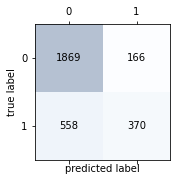

In [101]:
confusion(pre,label)

In [102]:
acc, pre, label = xgboost(imput_data)

In [103]:
acc

0.7364157948025649

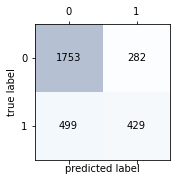

In [104]:
confusion(pre,label)

In [105]:
forest(imput_data)

(0.7499156260546743,
 array([0, 1, 0, ..., 1, 1, 0]),
 9611     0
 8570     1
 2662     1
 11888    1
 14801    1
         ..
 12177    0
 11971    0
 5123     1
 8229     1
 4742     0
 Name: mortality_90d, Length: 2963, dtype: int64)

In [106]:
acc

0.7364157948025649

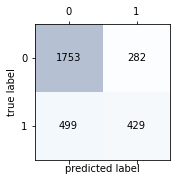

In [107]:
confusion(pre,label)

In [108]:
MLP(imput_data)

Epoch 1/10
1896/1896 [==============================] - 1s 790us/step - loss: 1.8630 - accuracy: 0.6725 - val_loss: 0.6295 - val_accuracy: 0.6827
Epoch 2/10
1896/1896 [==============================] - 1s 767us/step - loss: 0.6018 - accuracy: 0.6818 - val_loss: 0.5819 - val_accuracy: 0.6827
Epoch 3/10
1896/1896 [==============================] - 1s 746us/step - loss: 0.5846 - accuracy: 0.6826 - val_loss: 0.6007 - val_accuracy: 0.6827
Epoch 4/10
1896/1896 [==============================] - 1s 749us/step - loss: 0.5905 - accuracy: 0.7140 - val_loss: 0.5643 - val_accuracy: 0.7173
Epoch 5/10
1896/1896 [==============================] - 1s 737us/step - loss: 0.5656 - accuracy: 0.7150 - val_loss: 0.6092 - val_accuracy: 0.6624
Epoch 6/10
1896/1896 [==============================] - 1s 741us/step - loss: 0.5533 - accuracy: 0.7275 - val_loss: 0.5445 - val_accuracy: 0.7215
Epoch 7/10
1896/1896 [==============================] - 1s 738us/step - loss: 0.5488 - accuracy: 0.7272 - val_loss: 0.5723 -

(0.7223160266876221, 0.7283158898353577)

In [109]:
LSR(imput_data.drop(['los'],axis=1))

(4632779.942056532,
 9611     137.444371
 8570     -32.721683
 2662     -42.169515
 11888    223.511946
 14801    -60.467653
             ...    
 12177     12.121025
 11971     80.837797
 5123     -96.563709
 8229     177.117139
 4742      78.936901
 Name: leavetime, Length: 2963, dtype: float64)

In [134]:
forest(All_shape)

(0.7043478260869566,
 array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 0]),
 13013    0
 1830     1
 3182     1
 10673    0
 13898    0
         ..
 1893     1
 6432     1
 13519    1
 12815    0
 1811     1
 Name: mortality_90d, Length: 115, dtype: int64)